## Research questions

**How do people's favourite genres differ, and do those differing preferences have any correlations with mental health conditions?** 

### Sub questions:

**Which specific genres lead to more mental health conditions?**

### Analysis Plan

For this analysis, I lowered the age to 15-30 years old since I discovered most of the surveyers in the datasets were younger. I added a second dataset which allowed me to go furhter in depth with my research and look into other factors which may have been affecting my results. I compiled both datasets through method chains and functions. Ultimately, my goal was to find out if any music genres have  positive or negative connections to mental health conditions. Initially, OCD was one of the four conditions but I removed it to match the second dataset. Now, I'm only focused on depression, anxiety and insomnia. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
dataset = pd.read_csv('../data/raw/music_therapy_and_mental_health_survey_results (1).csv')
dataset

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


# Milestone 3 - Exploratory Data Analysis (EDA)

In [ ]:
# Initially I will find the count of rows and columns in the dataset

dataset.shape

(736, 33)

In [ ]:
# I also want to determine the names of different column names

for col in dataset.columns:
    print (col)

Timestamp
Age
Primary streaming service
Hours per day
While working
Instrumentalist
Composer
Fav genre
Exploratory
Foreign languages
BPM
Frequency [Classical]
Frequency [Country]
Frequency [EDM]
Frequency [Folk]
Frequency [Gospel]
Frequency [Hip hop]
Frequency [Jazz]
Frequency [K pop]
Frequency [Latin]
Frequency [Lofi]
Frequency [Metal]
Frequency [Pop]
Frequency [R&B]
Frequency [Rap]
Frequency [Rock]
Frequency [Video game music]
Anxiety
Depression
Insomnia
OCD
Music effects
Permissions


#### Note: The dataset has 736 rows and 33 columns. Since my reserach is oriented towards music genres and health conditions, I can remove unwanted columns to make it easier to work with data.

In [ ]:
# Remove unwanted colummns from dataset
dataset1 = dataset.drop(["Timestamp", "Primary streaming service", "Hours per day", "While working", "Instrumentalist", "Composer", "Exploratory", "Foreign languages", "BPM", "Music effects", "Permissions"], axis="columns")
dataset1

,Age,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],...,Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
0,18.0,Latin,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,...,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0
1,63.0,Rock,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,...,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0
2,18.0,Video game music,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,...,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0
3,61.0,Jazz,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,...,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0
4,18.0,R&B,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,...,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Rock,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,...,Rarely,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0
732,18.0,Pop,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,...,Never,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0
733,19.0,Rap,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,...,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0
734,19.0,Classical,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,...,Never,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0


In [ ]:
# Count number of values in each column. There should be 736 values in each.

dataset1.count()

Age                             735
Fav genre                       736
Frequency [Classical]           736
Frequency [Country]             736
Frequency [EDM]                 736
Frequency [Folk]                736
Frequency [Gospel]              736
Frequency [Hip hop]             736
Frequency [Jazz]                736
Frequency [K pop]               736
Frequency [Latin]               736
Frequency [Lofi]                736
Frequency [Metal]               736
Frequency [Pop]                 736
Frequency [R&B]                 736
Frequency [Rap]                 736
Frequency [Rock]                736
Frequency [Video game music]    736
Anxiety                         736
Depression                      736
Insomnia                        736
OCD                             736
dtype: int64

#### Note: Since there are no NaN values, I don't need to drop any rows

In [ ]:
# I want to determine what type of values are in each column. Frequency columns appear to have similar values while the 4 health condition columns appear to give numerical values.

dataset1['Frequency [Classical]'].unique()

array(['Rarely', 'Sometimes', 'Never', 'Very frequently'], dtype=object)

In [ ]:
# I will now find the values in health conditions columns

dataset1['Anxiety'].unique()

array([ 3. ,  7. ,  9. ,  8. ,  4. ,  5. ,  2. ,  1. ,  6. , 10. ,  0. ,
        7.5])

In [ ]:
# Finidng unique values in one last column

dataset1['Depression'].unique()

array([ 0. ,  2. ,  7. ,  8. ,  3. ,  1. ,  4. ,  5. ,  9. , 10. ,  6. ,
        3.5])

In [ ]:
# Lastly, I will use the describe function to find additional information

dataset1.describe()

,Age,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,736.000000,736.000000,736.000000
mean,25.206803,5.837636,4.796196,3.738451,2.637228
std,12.054970,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,4.000000,2.000000,1.000000,0.000000
50%,21.000000,6.000000,5.000000,3.000000,2.000000
75%,28.000000,8.000000,7.000000,6.000000,5.000000
max,89.000000,10.000000,10.000000,10.000000,10.000000


#### Note: For the Frequency columns, there are 4 values: Never, Rarely, Sometimes and Very frequently. For the health condition columns, each health condition is rated from 0-10. The higher the number, the more severe the condition.

[Text(0.5, 1.0, 'Favourite Genres by Count'),
 Text(0.5, 0, 'Count of People'),
 Text(0, 0.5, 'Favourite Genre')]

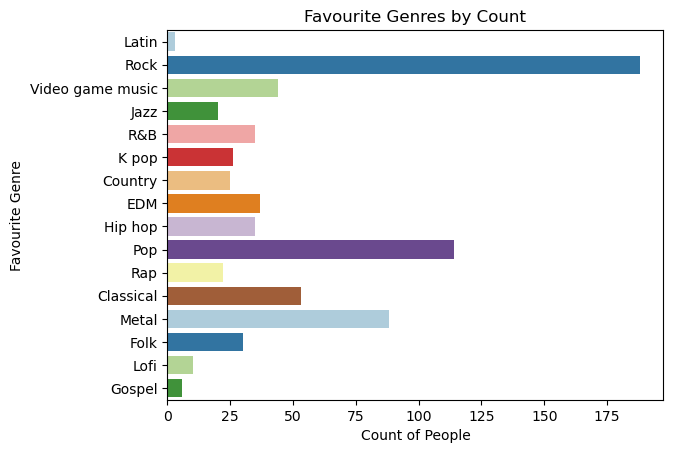

In [ ]:
# The first visualization I want to make is a simple count plot for the number of people and their favourite genre

import seaborn as sns
import matplotlib.pyplot as plt


v1 = sns.countplot(y='Fav genre', data=dataset1, palette='Paired')
v1.set(title='Favourite Genres by Count', xlabel='Count of People', ylabel='Favourite Genre')

In [ ]:
dataset1['Fav genre'].value_counts(sort=False)

Latin                 3
Rock                188
Video game music     44
Jazz                 20
R&B                  35
K pop                26
Country              25
EDM                  37
Hip hop              35
Pop                 114
Rap                  22
Classical            53
Metal                88
Folk                 30
Lofi                 10
Gospel                6
Name: Fav genre, dtype: int64

#### Note: Rock music is by far the most favourite and we can see the exact count is 188. 2nd place is Pop music with 114 people and 3rd is Metal with 88 people.

In [ ]:
age_count = dataset1['Age'].value_counts(sort=False)
age_count.sort_values(na_position='first')

89.0     1
10.0     1
69.0     1
72.0     1
73.0     1
        ..
16.0    44
21.0    52
17.0    59
19.0    61
18.0    85
Name: Age, Length: 61, dtype: int64

In [ ]:
# Trying to determine min and max values for Anxiety

dataset1['Anxiety'].agg(['min', 'max'])

min     0.0
max    10.0
Name: Anxiety, dtype: float64

In [ ]:
# Count of each value for Anxiety

dataset1['Anxiety'].value_counts(sort=False)

3.0      69
7.0     122
9.0      56
8.0     115
4.0      56
5.0      59
2.0      44
1.0      29
6.0      83
10.0     67
0.0      35
7.5       1
Name: Anxiety, dtype: int64

[Text(0.5, 1.0, 'Count of People at each Anxiety Level'),
 Text(0.5, 0, 'Anxiety Level (Scale of 1-10)'),
 Text(0, 0.5, 'Count')]

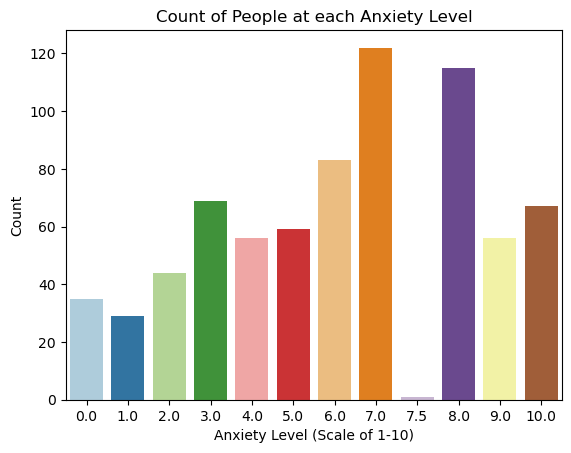

In [ ]:
# This visualization shows the count for people at each anxiety level

import seaborn as sns
import matplotlib.pyplot as plt


v2 = sns.countplot(x='Anxiety', data=dataset1, palette='Paired')
v2.set(title='Count of People at each Anxiety Level', xlabel='Anxiety Level (Scale of 1-10)', ylabel= 'Count')

In [ ]:
# Count of each value for Depression

dataset1['Depression'].value_counts(sort=False)

0.0     84
2.0     93
7.0     96
8.0     77
3.0     59
1.0     40
4.0     58
5.0     56
9.0     38
10.0    45
6.0     88
3.5      2
Name: Depression, dtype: int64

[Text(0.5, 1.0, 'Count of People at each Depression Level'),
 Text(0.5, 0, 'Depression Level (Scale of 1-10)'),
 Text(0, 0.5, 'Count')]

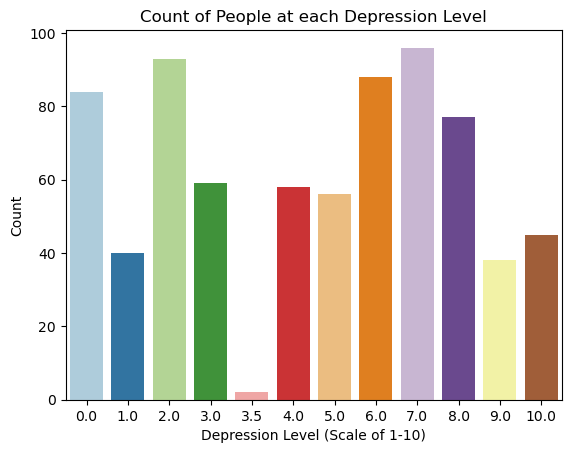

In [ ]:
# This visualization shows the count for people at each depression level

import seaborn as sns
import matplotlib.pyplot as plt


v3 = sns.countplot(x='Depression', data=dataset1, palette='Paired')
v3.set(title='Count of People at each Depression Level', xlabel='Depression Level (Scale of 1-10)', ylabel= 'Count')

In [ ]:
# Count of each value for Insomnia

dataset1['Insomnia'].value_counts(sort=False)

1.0      82
2.0      88
10.0     34
3.0      68
5.0      58
7.0      59
6.0      62
0.0     149
4.0      59
8.0      49
9.0      27
3.5       1
Name: Insomnia, dtype: int64

[Text(0.5, 1.0, 'Count of People at each Insomnia Level'),
 Text(0.5, 0, 'Insomnia Level (Scale of 1-10)'),
 Text(0, 0.5, 'Count')]

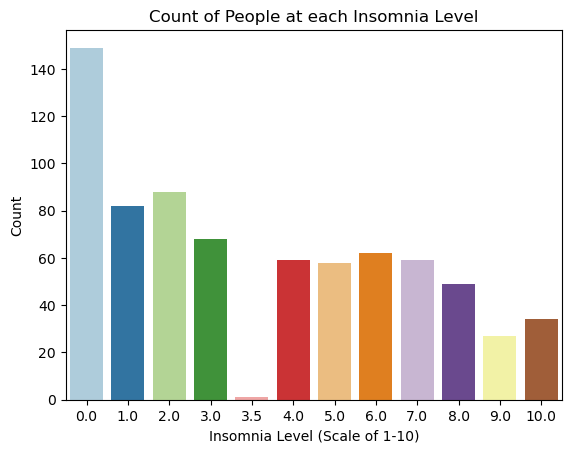

In [ ]:
# This visualization shows the count for people at each insomnia level

import seaborn as sns
import matplotlib.pyplot as plt


v4 = sns.countplot(x='Insomnia', data=dataset1, palette='Paired')
v4.set(title='Count of People at each Insomnia Level', xlabel='Insomnia Level (Scale of 1-10)', ylabel= 'Count')

In [ ]:
# Count of each value for OCD

dataset1['OCD'].value_counts(sort=False)

0.0     248
1.0      95
2.0      96
3.0      64
9.0      14
7.0      34
4.0      48
6.0      33
10.0     20
5.0      54
8.0      28
8.5       1
5.5       1
Name: OCD, dtype: int64

[Text(0.5, 1.0, 'Count of People at each OCD Level'),
 Text(0.5, 0, 'OCD Level (Scale of 1-10)'),
 Text(0, 0.5, 'Count')]

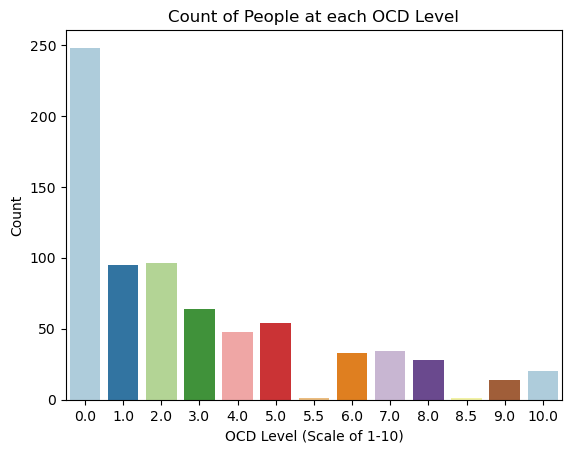

In [ ]:
# This visualization shows the count for people at each OCD level

import seaborn as sns
import matplotlib.pyplot as plt


v5 = sns.countplot(x='OCD', data=dataset1, palette='Paired')
v5.set(title='Count of People at each OCD Level', xlabel='OCD Level (Scale of 1-10)', ylabel= 'Count')

#### Note: Based on the counts above, it's obvious that Anxiety is the most serious mental health condition based on dataset results. 113 out of 736 people rated Anxiety a 9 or 10 while another 238 rated themselves between 7 and 8. Depression is the second most serious condition, however, the results are all over the place. For Insomnia, while over 140 people rated the section at 0. Besides that, ratings were evenly spread across the scale. Lastly, OCD seems to be the least serious condition as nearly 250 out of 736 people gave the section a 0.

In [ ]:
# Calculate a weighted average for the 4 health conditions

dataset1['Weighted Average for Health Conditions'] = (dataset1['Anxiety'] + dataset1['Depression'] + dataset1['Insomnia'] + dataset1['OCD'])/4 * 10
dataset1

,Age,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Weighted Average for Health Conditions
0,18.0,Latin,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,10.0
1,63.0,Rock,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,30.0
2,18.0,Video game music,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,65.0
3,61.0,Jazz,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,55.0
4,18.0,R&B,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,57.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Rock,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,55.0
732,18.0,Pop,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,30.0
733,19.0,Rap,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,20.0
734,19.0,Classical,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,20.0


[Text(0.5, 1.0, 'Correlation of Weighted Average Health Conditons by Genre'),
 Text(0.5, 0, 'Weighted Average for Health Conditons'),
 Text(0, 0.5, 'Genre')]

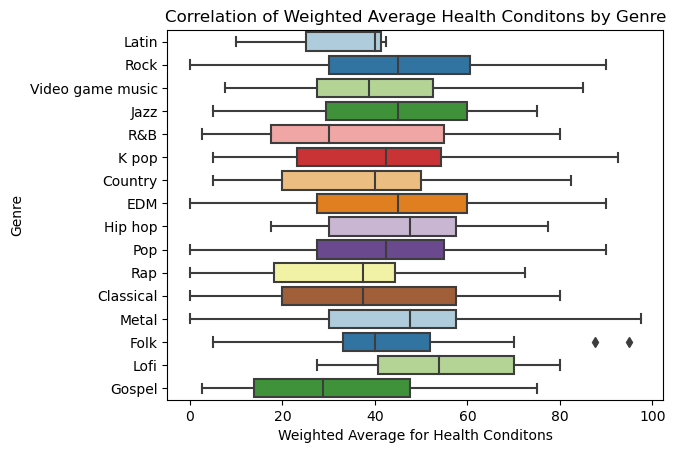

In [ ]:
# Now I will create a visalization between Fav Genres and the Weighted Average for Health Conditions

import seaborn as sns
import matplotlib.pyplot as plt


v6 = sns.boxplot(y='Fav genre', x='Weighted Average for Health Conditions', data=dataset1, palette='Paired')
v6.set(title='Correlation of Weighted Average Health Conditons by Genre', xlabel='Weighted Average for Health Conditons', ylabel= 'Genre')

#### Note: Based on the graph above, it can be observed that people who consider Lofi to be their favourite genre tend have a higher average of mental health conditions while Metal seems have the highest weighted average score. On the flip side, Gospel has the lowest weighted average score, although, it's important to consider that only 6 people said Gospel was their favourite genre. Latin is definitely a contender with Gospel, although it is another uncommon genre.

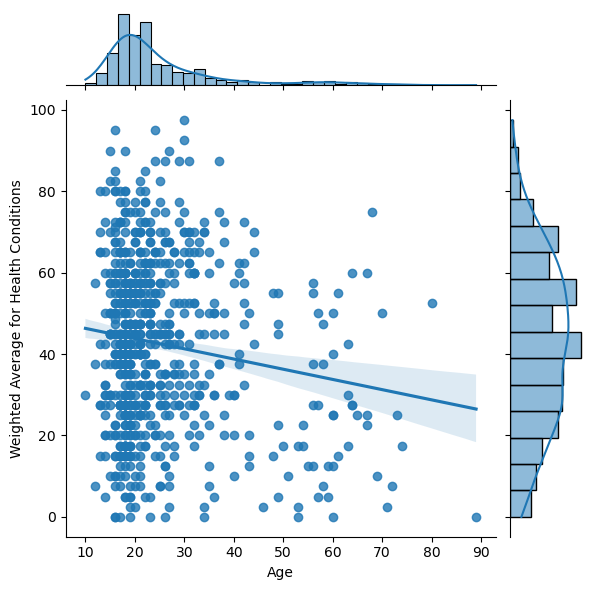

In [ ]:
# Visualize Age and Weighted Average for Health Conditions to determine if there are any trends

import seaborn as sns
import matplotlib.pyplot as plt


v7 = sns.jointplot(x='Age', y='Weighted Average for Health Conditions', data=dataset1, kind='reg')

#### Note: Based on this graph, it suggests that as age increases, the average health conditions go down. While this is extremely bizarre, one indicator that may explain these results in the age axis. The majority of ages involved in this survey are from 10-40 years. This means that the results are more accurate. For older participants, there just isn't a lot of data to be deemed accurate.

# Milestone 4 - Visualizations, Analysis, and Pipeline

## Task 1 - Analysis Pipeline

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### Based on the results of the previous milestone, I will remove some columns to reduce the number of data. This will help align with the implementation of the second dataset as I will only keep data which is found on both.

In [ ]:
dataset2 = dataset1.drop(['Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [R&B]', 'Frequency [Video game music]', 'OCD'], axis="columns")
dataset2

,Age,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Jazz],Frequency [Metal],Frequency [Pop],Frequency [Rap],Frequency [Rock],Anxiety,Depression,Insomnia,Weighted Average for Health Conditions
0,18.0,Latin,Rarely,Never,Rarely,Never,Never,Never,Very frequently,Very frequently,Never,3.0,0.0,1.0,10.0
1,63.0,Rock,Sometimes,Never,Never,Rarely,Very frequently,Never,Sometimes,Rarely,Very frequently,7.0,2.0,2.0,30.0
2,18.0,Video game music,Never,Never,Very frequently,Never,Rarely,Sometimes,Rarely,Rarely,Rarely,7.0,7.0,10.0,65.0
3,61.0,Jazz,Sometimes,Never,Never,Rarely,Very frequently,Never,Sometimes,Never,Never,9.0,7.0,3.0,55.0
4,18.0,R&B,Never,Never,Rarely,Never,Never,Never,Sometimes,Very frequently,Never,7.0,2.0,5.0,57.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Rock,Very frequently,Rarely,Never,Sometimes,Rarely,Rarely,Very frequently,Rarely,Very frequently,7.0,6.0,0.0,55.0
732,18.0,Pop,Rarely,Rarely,Never,Never,Rarely,Never,Very frequently,Never,Sometimes,3.0,2.0,2.0,30.0
733,19.0,Rap,Rarely,Sometimes,Sometimes,Rarely,Rarely,Rarely,Sometimes,Sometimes,Rarely,2.0,2.0,2.0,20.0
734,19.0,Classical,Very frequently,Never,Never,Never,Rarely,Never,Never,Never,Never,2.0,3.0,2.0,20.0


#### I will also keep ages between 15-30. Many young people enjoy listening to music and I found the dataset had very few older surveyers. 

In [ ]:
dataset3 = dataset2[(dataset2['Age'] >= 15) & (dataset2['Age'] <= 30)]
dataset3

,Age,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Jazz],Frequency [Metal],Frequency [Pop],Frequency [Rap],Frequency [Rock],Anxiety,Depression,Insomnia,Weighted Average for Health Conditions
0,18.0,Latin,Rarely,Never,Rarely,Never,Never,Never,Very frequently,Very frequently,Never,3.0,0.0,1.0,10.0
2,18.0,Video game music,Never,Never,Very frequently,Never,Rarely,Sometimes,Rarely,Rarely,Rarely,7.0,7.0,10.0,65.0
4,18.0,R&B,Never,Never,Rarely,Never,Never,Never,Sometimes,Very frequently,Never,7.0,2.0,5.0,57.5
5,18.0,Jazz,Rarely,Sometimes,Never,Never,Very frequently,Rarely,Very frequently,Very frequently,Very frequently,8.0,8.0,7.0,75.0
6,18.0,Video game music,Sometimes,Never,Rarely,Sometimes,Sometimes,Rarely,Rarely,Never,Never,4.0,8.0,6.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Rock,Very frequently,Rarely,Never,Sometimes,Rarely,Rarely,Very frequently,Rarely,Very frequently,7.0,6.0,0.0,55.0
732,18.0,Pop,Rarely,Rarely,Never,Never,Rarely,Never,Very frequently,Never,Sometimes,3.0,2.0,2.0,30.0
733,19.0,Rap,Rarely,Sometimes,Sometimes,Rarely,Rarely,Rarely,Sometimes,Sometimes,Rarely,2.0,2.0,2.0,20.0
734,19.0,Classical,Very frequently,Never,Never,Never,Rarely,Never,Never,Never,Never,2.0,3.0,2.0,20.0


In [ ]:
dataset3.dtypes

Age                                       float64
Fav genre                                  object
Frequency [Classical]                      object
Frequency [Country]                        object
Frequency [EDM]                            object
Frequency [Folk]                           object
Frequency [Jazz]                           object
Frequency [Metal]                          object
Frequency [Pop]                            object
Frequency [Rap]                            object
Frequency [Rock]                           object
Anxiety                                   float64
Depression                                float64
Insomnia                                  float64
Weighted Average for Health Conditions    float64
dtype: object

#### Load second dataset

In [ ]:
YPSdataset = pd.read_csv('../data/raw/Young_People_Survey.csv')
YPSdataset.dropna().reset_index(drop=True)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
4,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,20.0,186.0,77.0,1.0,male,right handed,secondary school,no,city,block of flats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,5.0,3.0,4.0,1.0,2.0,3.0,2.0,3.0,3.0,4.0,...,22.0,175.0,60.0,1.0,male,right handed,secondary school,no,city,block of flats
670,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
671,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
672,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


#### This dataset has a lot of information. I will only focus on relevant information which relates to the first dataset. This includes age, music preference and mental health

In [ ]:
YPSdataset = YPSdataset[['Dance', 'Folk', 'Country', 'Classical music', 'Pop', 'Rock', 'Metal or Hardrock', 'Hiphop, Rap', 'Swing, Jazz', 'Age', 'Hypochondria', 'Loneliness', 'Getting up']]
YPSdataset

,Dance,Folk,Country,Classical music,Pop,Rock,Metal or Hardrock,"Hiphop, Rap","Swing, Jazz",Age,Hypochondria,Loneliness,Getting up
0,2.0,1.0,2.0,2.0,5.0,5.0,1.0,1.0,1.0,20.0,1.0,3.0,2.0
1,2.0,1.0,1.0,1.0,3.0,5.0,4.0,1.0,1.0,19.0,1.0,2.0,5.0
2,2.0,2.0,3.0,4.0,3.0,5.0,3.0,1.0,3.0,20.0,1.0,5.0,4.0
3,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,22.0,3.0,5.0,1.0
4,4.0,3.0,2.0,4.0,5.0,3.0,1.0,5.0,2.0,20.0,1.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,2.0,5.0,4.0,4.0,3.0,4.0,5.0,20.0,1.0,4.0,5.0
1006,5.0,1.0,3.0,4.0,4.0,1.0,1.0,1.0,2.0,27.0,1.0,1.0,1.0
1007,1.0,1.0,2.0,2.0,3.0,4.0,1.0,3.0,2.0,18.0,1.0,4.0,5.0
1008,3.0,3.0,1.0,3.0,3.0,4.0,1.0,2.0,3.0,25.0,1.0,3.0,5.0


#### Next, I will rename some of the columns to match with the first dataset

In [ ]:
YPSdataset.rename(columns={"Dance": "Frequency [EDM]",
                           "Classical music": "Frequency [Classical]", 
                           "Metal or Hardrock": "Frequency [Metal]",
                           "Hiphop, Rap": "Frequency [Rap]",
                           "Swing, Jazz": "Frequency [Jazz]", 
                           "Folk": "Frequency [Folk]", 
                           "Country": "Frequency [Country]", 
                           "Pop": "Frequency [Pop]", 
                           "Rock": "Frequency [Rock]",
                           "Hypochondria": "Anxiety", 
                           "Loneliness": "Depression", 
                           "Getting up": "Insomnia"}, inplace=True)
YPSdataset

,Frequency [EDM],Frequency [Folk],Frequency [Country],Frequency [Classical],Frequency [Pop],Frequency [Rock],Frequency [Metal],Frequency [Rap],Frequency [Jazz],Age,Anxiety,Depression,Insomnia
0,2.0,1.0,2.0,2.0,5.0,5.0,1.0,1.0,1.0,20.0,1.0,3.0,2.0
1,2.0,1.0,1.0,1.0,3.0,5.0,4.0,1.0,1.0,19.0,1.0,2.0,5.0
2,2.0,2.0,3.0,4.0,3.0,5.0,3.0,1.0,3.0,20.0,1.0,5.0,4.0
3,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,22.0,3.0,5.0,1.0
4,4.0,3.0,2.0,4.0,5.0,3.0,1.0,5.0,2.0,20.0,1.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,2.0,5.0,4.0,4.0,3.0,4.0,5.0,20.0,1.0,4.0,5.0
1006,5.0,1.0,3.0,4.0,4.0,1.0,1.0,1.0,2.0,27.0,1.0,1.0,1.0
1007,1.0,1.0,2.0,2.0,3.0,4.0,1.0,3.0,2.0,18.0,1.0,4.0,5.0
1008,3.0,3.0,1.0,3.0,3.0,4.0,1.0,2.0,3.0,25.0,1.0,3.0,5.0


#### For convenience, I will reorder the second dataset to match with the first

In [ ]:
YPSdataset = YPSdataset.reindex(['Age','Frequency [Classical]','Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Jazz]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [Rap]', 'Frequency [Rock]', 'Anxiety', 'Depression', 'Insomnia'], axis=1)
YPSdataset

,Age,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Jazz],Frequency [Metal],Frequency [Pop],Frequency [Rap],Frequency [Rock],Anxiety,Depression,Insomnia
0,20.0,2.0,2.0,2.0,1.0,1.0,1.0,5.0,1.0,5.0,1.0,3.0,2.0
1,19.0,1.0,1.0,2.0,1.0,1.0,4.0,3.0,1.0,5.0,1.0,2.0,5.0
2,20.0,4.0,3.0,2.0,2.0,3.0,3.0,3.0,1.0,5.0,1.0,5.0,4.0
3,22.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,5.0,1.0
4,20.0,4.0,2.0,4.0,3.0,2.0,1.0,5.0,5.0,3.0,1.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,20.0,5.0,2.0,5.0,2.0,5.0,3.0,4.0,4.0,4.0,1.0,4.0,5.0
1006,27.0,4.0,3.0,5.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0
1007,18.0,2.0,2.0,1.0,1.0,2.0,1.0,3.0,3.0,4.0,1.0,4.0,5.0
1008,25.0,3.0,1.0,3.0,3.0,3.0,1.0,3.0,2.0,4.0,1.0,3.0,5.0


#### Since all data in the 2nd dataset ranges from 1-5, I will multiply it by 2 so it ranges from 1-10. This way, both datasets will be identical in range of numbers

In [ ]:
YPSdataset['Frequency [Classical]'] = YPSdataset['Frequency [Classical]'].apply(lambda x: x*2)
YPSdataset['Frequency [Country]'] = YPSdataset['Frequency [Country]'].apply(lambda x: x*2)
YPSdataset['Frequency [EDM]'] = YPSdataset['Frequency [EDM]'].apply(lambda x: x*2)
YPSdataset['Frequency [Jazz]'] = YPSdataset['Frequency [Jazz]'].apply(lambda x: x*2)
YPSdataset['Frequency [Metal]'] = YPSdataset['Frequency [Metal]'].apply(lambda x: x*2)
YPSdataset['Frequency [Pop]'] = YPSdataset['Frequency [Pop]'].apply(lambda x: x*2)
YPSdataset['Frequency [Rap]'] = YPSdataset['Frequency [Rap]'].apply(lambda x: x*2)
YPSdataset['Frequency [Rock]'] = YPSdataset['Frequency [Rock]'].apply(lambda x: x*2)
YPSdataset['Frequency [Folk]'] = YPSdataset['Frequency [Folk]'].apply(lambda x: x*2)
YPSdataset['Anxiety'] = YPSdataset['Anxiety'].apply(lambda x: x*2)
YPSdataset['Depression'] = YPSdataset['Depression'].apply(lambda x: x*2)
YPSdataset['Insomnia'] = YPSdataset['Insomnia'].apply(lambda x: x*2)

YPSdataset

,Age,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Jazz],Frequency [Metal],Frequency [Pop],Frequency [Rap],Frequency [Rock],Anxiety,Depression,Insomnia
0,20.0,4.0,4.0,4.0,2.0,2.0,2.0,10.0,2.0,10.0,2.0,6.0,4.0
1,19.0,2.0,2.0,4.0,2.0,2.0,8.0,6.0,2.0,10.0,2.0,4.0,10.0
2,20.0,8.0,6.0,4.0,4.0,6.0,6.0,6.0,2.0,10.0,2.0,10.0,8.0
3,22.0,2.0,2.0,4.0,2.0,2.0,2.0,4.0,4.0,4.0,6.0,10.0,2.0
4,20.0,8.0,4.0,8.0,6.0,4.0,2.0,10.0,10.0,6.0,2.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,20.0,10.0,4.0,10.0,4.0,10.0,6.0,8.0,8.0,8.0,2.0,8.0,10.0
1006,27.0,8.0,6.0,10.0,2.0,4.0,2.0,8.0,2.0,2.0,2.0,2.0,2.0
1007,18.0,4.0,4.0,2.0,2.0,4.0,2.0,6.0,6.0,8.0,2.0,8.0,10.0
1008,25.0,6.0,2.0,6.0,6.0,6.0,2.0,6.0,4.0,8.0,2.0,6.0,10.0


#### To ensure age for second dataset is between 15-30

In [ ]:
YPSdataset = YPSdataset[(YPSdataset['Age'] >= 15) & (YPSdataset['Age'] <= 30)]
YPSdataset

,Age,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Jazz],Frequency [Metal],Frequency [Pop],Frequency [Rap],Frequency [Rock],Anxiety,Depression,Insomnia
0,20.0,4.0,4.0,4.0,2.0,2.0,2.0,10.0,2.0,10.0,2.0,6.0,4.0
1,19.0,2.0,2.0,4.0,2.0,2.0,8.0,6.0,2.0,10.0,2.0,4.0,10.0
2,20.0,8.0,6.0,4.0,4.0,6.0,6.0,6.0,2.0,10.0,2.0,10.0,8.0
3,22.0,2.0,2.0,4.0,2.0,2.0,2.0,4.0,4.0,4.0,6.0,10.0,2.0
4,20.0,8.0,4.0,8.0,6.0,4.0,2.0,10.0,10.0,6.0,2.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,20.0,10.0,4.0,10.0,4.0,10.0,6.0,8.0,8.0,8.0,2.0,8.0,10.0
1006,27.0,8.0,6.0,10.0,2.0,4.0,2.0,8.0,2.0,2.0,2.0,2.0,2.0
1007,18.0,4.0,4.0,2.0,2.0,4.0,2.0,6.0,6.0,8.0,2.0,8.0,10.0
1008,25.0,6.0,2.0,6.0,6.0,6.0,2.0,6.0,4.0,8.0,2.0,6.0,10.0


In [ ]:
YPSdataset.dtypes

Age                      float64
Frequency [Classical]    float64
Frequency [Country]      float64
Frequency [EDM]          float64
Frequency [Folk]         float64
Frequency [Jazz]         float64
Frequency [Metal]        float64
Frequency [Pop]          float64
Frequency [Rap]          float64
Frequency [Rock]         float64
Anxiety                  float64
Depression               float64
Insomnia                 float64
dtype: object

#### Merging the two datasets together to have one large dataset

In [ ]:
merged_data = pd.concat([dataset3, YPSdataset], axis=0,ignore_index=True)
merged_data

,Age,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Jazz],Frequency [Metal],Frequency [Pop],Frequency [Rap],Frequency [Rock],Anxiety,Depression,Insomnia,Weighted Average for Health Conditions
0,18.0,Latin,Rarely,Never,Rarely,Never,Never,Never,Very frequently,Very frequently,Never,3.0,0.0,1.0,10.0
1,18.0,Video game music,Never,Never,Very frequently,Never,Rarely,Sometimes,Rarely,Rarely,Rarely,7.0,7.0,10.0,65.0
2,18.0,R&B,Never,Never,Rarely,Never,Never,Never,Sometimes,Very frequently,Never,7.0,2.0,5.0,57.5
3,18.0,Jazz,Rarely,Sometimes,Never,Never,Very frequently,Rarely,Very frequently,Very frequently,Very frequently,8.0,8.0,7.0,75.0
4,18.0,Video game music,Sometimes,Never,Rarely,Sometimes,Sometimes,Rarely,Rarely,Never,Never,4.0,8.0,6.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,20.0,NaN,10.0,4.0,10.0,4.0,10.0,6.0,8.0,8.0,8.0,2.0,8.0,10.0,NaN
1556,27.0,NaN,8.0,6.0,10.0,2.0,4.0,2.0,8.0,2.0,2.0,2.0,2.0,2.0,NaN
1557,18.0,NaN,4.0,4.0,2.0,2.0,4.0,2.0,6.0,6.0,8.0,2.0,8.0,10.0,NaN
1558,25.0,NaN,6.0,2.0,6.0,6.0,6.0,2.0,6.0,4.0,8.0,2.0,6.0,10.0,NaN


## Task 2 - Method Chaining and writing Python programs

#### First, I will create a method chain for all the dataset wrangling I did above

In [ ]:
def GenreConversion(x, genre):
    '''
    This function converts the string values of the specified genre column into numerical values to make them easier to analyze through data visualizations.
    '''
    if x[f'Frequency [{genre}]'] == "Never":
        return 1.0
    elif x[f'Frequency [{genre}]'] == "Rarely":
        return 4.0
    elif x[f'Frequency [{genre}]'] == "Sometimes":
        return 7.0
    else:
        return 10.0


In [ ]:
for genre in ['Classical', 'Country', 'EDM', 'Folk', 'Jazz', 'Metal', 'Pop', 'Rap', 'Rock']:
    dataset3.loc[:, f'Frequency_[{genre}]_num'] = dataset3.apply(lambda x: GenreConversion(x, genre), axis='columns')


In [ ]:
# Step 1 Build and test your method chain(s)

methodchain_one = (
         pd.read_csv('../data/raw/music_therapy_and_mental_health_survey_results (1).csv')
        .drop(['Timestamp', 'Primary streaming service', 'Hours per day', 'While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages', 'BPM', 'Music effects', 'Permissions', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [R&B]', 'Frequency [Video game music]', 'OCD'], axis="columns")
        .loc[(pd.read_csv('../data/raw/music_therapy_and_mental_health_survey_results (1).csv')['Age'] >= 15) & (pd.read_csv('../data/raw/music_therapy_and_mental_health_survey_results (1).csv')['Age'] <= 30)]
        .assign(**{f'Frequency_[{genre}]_num': pd.read_csv('../data/raw/music_therapy_and_mental_health_survey_results (1).csv').apply(lambda x: GenreConversion(x, genre), axis='columns') for genre in ['Classical', 'Country', 'EDM', 'Folk', 'Jazz', 'Metal', 'Pop', 'Rap', 'Rock']})
        .loc[~pd.read_csv('../data/raw/music_therapy_and_mental_health_survey_results (1).csv')['Fav genre'].str.contains('Gospel|Hip hop|K pop|Latin|Lofi|R&B|Video game music')]
        .drop(['Frequency [Classical]','Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Jazz]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [Rap]', 'Frequency [Rock]'], axis="columns")
        .loc[:, ['Age', 'Fav genre', 'Frequency_[Classical]_num', 'Frequency_[Country]_num','Frequency_[EDM]_num', 'Frequency_[Folk]_num', 'Frequency_[Jazz]_num','Frequency_[Metal]_num', 'Frequency_[Pop]_num', 'Frequency_[Rap]_num','Frequency_[Rock]_num', 'Anxiety', 'Depression', 'Insomnia']]
        .reset_index(drop=True)
)

methodchain_one


,Age,Fav genre,Frequency_[Classical]_num,Frequency_[Country]_num,Frequency_[EDM]_num,Frequency_[Folk]_num,Frequency_[Jazz]_num,Frequency_[Metal]_num,Frequency_[Pop]_num,Frequency_[Rap]_num,Frequency_[Rock]_num,Anxiety,Depression,Insomnia
0,18.0,Jazz,4.0,7.0,1.0,1.0,10.0,4.0,10.0,10.0,10.0,8.0,8.0,7.0
1,19.0,Rock,1.0,10.0,1.0,7.0,1.0,10.0,1.0,1.0,10.0,2.0,0.0,0.0
2,18.0,Country,1.0,10.0,1.0,1.0,1.0,1.0,4.0,1.0,4.0,7.0,7.0,4.0
3,19.0,EDM,4.0,1.0,10.0,1.0,4.0,1.0,4.0,7.0,4.0,1.0,0.0,0.0
4,19.0,Country,1.0,10.0,4.0,7.0,1.0,1.0,4.0,10.0,1.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,21.0,Pop,1.0,4.0,7.0,1.0,4.0,1.0,10.0,7.0,10.0,6.0,2.0,2.0
424,17.0,Rock,10.0,4.0,1.0,7.0,4.0,4.0,10.0,4.0,10.0,7.0,6.0,0.0
425,18.0,Pop,4.0,4.0,1.0,1.0,4.0,1.0,10.0,1.0,7.0,3.0,2.0,2.0
426,19.0,Rap,4.0,7.0,7.0,4.0,4.0,4.0,7.0,7.0,4.0,2.0,2.0,2.0


In [ ]:
methodchain_one.to_csv('../data/processed/analysisHaiderdataset1.csv', index=False)

In [ ]:
methodchain_one.columns

Index(['Age', 'Fav genre', 'Frequency_[Classical]_num',
       'Frequency_[Country]_num', 'Frequency_[EDM]_num',
       'Frequency_[Folk]_num', 'Frequency_[Jazz]_num', 'Frequency_[Metal]_num',
       'Frequency_[Pop]_num', 'Frequency_[Rap]_num', 'Frequency_[Rock]_num',
       'Anxiety', 'Depression', 'Insomnia'],
      dtype='object')

In [ ]:
# Step 2 Wrap your method chain(s) in a function

def load_and_process(url_or_path_to_csv_file):

    
    def GenreConversion(x, genre):
        '''
        This function converts the string values of the specified genre column into numerical values to make them easier to analyze through data visualizations.
        '''
        if x[f'Frequency [{genre}]'] == "Never":
            return 1.0
        elif x[f'Frequency [{genre}]'] == "Rarely":
            return 4.0
        elif x[f'Frequency [{genre}]'] == "Sometimes":
            return 7.0
        else:
            return 10.0

        # Method Chain 1 (Load data and deal with missing data)

    methodchain1 = (
         pd.read_csv('../data/raw/music_therapy_and_mental_health_survey_results (1).csv')
        .drop(['Timestamp', 'Primary streaming service', 'Hours per day', 'While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages', 'BPM', 'Music effects', 'Permissions', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [R&B]', 'Frequency [Video game music]', 'OCD'], axis="columns")
)


    # Method Chain 2 (Create new columns, drop others, and do processing)

    methodchain2 = (
          methodchain1
        .loc[(pd.read_csv('../data/raw/music_therapy_and_mental_health_survey_results (1).csv')['Age'] >= 15) & (pd.read_csv('../data/raw/music_therapy_and_mental_health_survey_results (1).csv')['Age'] <= 30)]
        .assign(**{f'Frequency_[{genre}]_num': pd.read_csv('../data/raw/music_therapy_and_mental_health_survey_results (1).csv').apply(lambda x: GenreConversion(x, genre), axis='columns') for genre in ['Classical', 'Country', 'EDM', 'Folk', 'Jazz', 'Metal', 'Pop', 'Rap', 'Rock']})
        .loc[~pd.read_csv('../data/raw/music_therapy_and_mental_health_survey_results (1).csv')['Fav genre'].str.contains('Gospel|Hip hop|K pop|Latin|Lofi|R&B|Video game music')]
        .drop(['Frequency [Classical]','Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Jazz]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [Rap]', 'Frequency [Rock]'], axis="columns")
        .loc[:, ['Age','Frequency_[Classical]_num', 'Frequency_[Country]_num','Frequency_[EDM]_num', 'Frequency_[Folk]_num', 'Frequency_[Jazz]_num','Frequency_[Metal]_num', 'Frequency_[Pop]_num', 'Frequency_[Rap]_num','Frequency_[Rock]_num', 'Anxiety', 'Depression', 'Insomnia']]
        .reset_index(drop=True)
    )

    
    # Make sure to return the latest dataframe

    return methodchain2 

In [ ]:
# running function now:

methodchain2 = load_and_process('../data/raw/music_therapy_and_mental_health_survey_results (1).csv')

In [ ]:
# Step 3 Move your function into a new .py file

def GenreConversion(x, genre):
    '''
    This function converts the string values of the specified genre column into numerical values to make them easier to analyze through data visualizations.
    '''
    if x[f'Frequency [{genre}]'] == "Never":
        return 1.0
    elif x[f'Frequency [{genre}]'] == "Rarely":
        return 4.0
    elif x[f'Frequency [{genre}]'] == "Sometimes":
        return 7.0
    else:
        return 10.0

import scripts
from scripts import project_functions2 as pf

d1functions = pf.load_and_process('../data/raw/music_therapy_and_mental_health_survey_results (1).csv')
d1functions


,Age,Frequency_[Classical]_num,Frequency_[Country]_num,Frequency_[EDM]_num,Frequency_[Folk]_num,Frequency_[Jazz]_num,Frequency_[Metal]_num,Frequency_[Pop]_num,Frequency_[Rap]_num,Frequency_[Rock]_num,Anxiety,Depression,Insomnia
0,18.0,4.0,7.0,1.0,1.0,10.0,4.0,10.0,10.0,10.0,8.0,8.0,7.0
1,19.0,1.0,10.0,1.0,7.0,1.0,10.0,1.0,1.0,10.0,2.0,0.0,0.0
2,18.0,1.0,10.0,1.0,1.0,1.0,1.0,4.0,1.0,4.0,7.0,7.0,4.0
3,19.0,4.0,1.0,10.0,1.0,4.0,1.0,4.0,7.0,4.0,1.0,0.0,0.0
4,19.0,1.0,10.0,4.0,7.0,1.0,1.0,4.0,10.0,1.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,21.0,1.0,4.0,7.0,1.0,4.0,1.0,10.0,7.0,10.0,6.0,2.0,2.0
424,17.0,10.0,4.0,1.0,7.0,4.0,4.0,10.0,4.0,10.0,7.0,6.0,0.0
425,18.0,4.0,4.0,1.0,1.0,4.0,1.0,10.0,1.0,7.0,3.0,2.0,2.0
426,19.0,4.0,7.0,7.0,4.0,4.0,4.0,7.0,7.0,4.0,2.0,2.0,2.0


In [ ]:
methodchain_three = (
                pd.read_csv('../data/raw/Young_People_Survey.csv') \
                .loc[:, ['Dance', 'Folk', 'Country', 'Classical music', 'Pop', 'Rock', 'Metal or Hardrock', 'Hiphop, Rap', 'Swing, Jazz', 'Age', 'Hypochondria', 'Loneliness', 'Getting up', 'Smoking', 'Alcohol', 'Life struggles']]
                .rename(columns={"Dance": "Frequency_[EDM]_num",
                                  "Classical music": "Frequency_[Classical]_num", 
                                  "Metal or Hardrock": "Frequency_[Metal]_num",
                                  "Hiphop, Rap": "Frequency_[Rap]_num",
                                  "Swing, Jazz": "Frequency_[Jazz]_num", 
                                  "Folk": "Frequency_[Folk]_num", 
                                  "Country": "Frequency_[Country]_num", 
                                  "Pop": "Frequency_[Pop]_num", 
                                  "Rock": "Frequency_[Rock]_num",
                                  "Hypochondria": "Anxiety", 
                                  "Loneliness": "Depression", 
                                  "Getting up": "Insomnia"})
                .replace({'Smoking': {'never smoked': 1.0, 'tried smoking': 4.0, 'former smoker': 7.0, 'current smoker': 10.0}})
                .replace({'Alcohol': {'Never': 1.0, 'social drinker': 5.0, 'drink a lot': 10.0}})
                .assign(**{'Frequency_[Classical]_num': lambda x: x['Frequency_[Classical]_num'] * 2,
                           'Frequency_[Country]_num': lambda x: x['Frequency_[Country]_num'] * 2,
                           'Frequency_[EDM]_num': lambda x: x['Frequency_[EDM]_num'] * 2,
                           'Frequency_[Jazz]_num': lambda x: x['Frequency_[Jazz]_num'] * 2,
                           'Frequency_[Metal]_num': lambda x: x['Frequency_[Metal]_num'] * 2,
                           'Frequency_[Pop]_num': lambda x: x['Frequency_[Pop]_num'] * 2,
                           'Frequency_[Rap]_num': lambda x: x['Frequency_[Rap]_num'] * 2,
                           'Frequency_[Rock]_num': lambda x: x['Frequency_[Rock]_num'] * 2,
                           'Frequency_[Folk]_num': lambda x: x['Frequency_[Folk]_num'] * 2,
                           'Anxiety': lambda x: x['Anxiety'] * 2,
                           'Depression': lambda x: x['Depression'] * 2,
                           'Insomnia': lambda x: x['Insomnia'] * 2,
                           'Life struggles': lambda x: x['Life struggles'] * 2})
                .query('Age.between(15, 30)')
                .loc[:, ['Age','Frequency_[Classical]_num', 'Frequency_[Country]_num','Frequency_[EDM]_num', 'Frequency_[Folk]_num', 'Frequency_[Jazz]_num','Frequency_[Metal]_num', 'Frequency_[Pop]_num', 'Frequency_[Rap]_num','Frequency_[Rock]_num', 'Smoking', 'Alcohol', 'Life struggles', 'Anxiety', 'Depression', 'Insomnia']]
)

methodchain_three

,Age,Frequency_[Classical]_num,Frequency_[Country]_num,Frequency_[EDM]_num,Frequency_[Folk]_num,Frequency_[Jazz]_num,Frequency_[Metal]_num,Frequency_[Pop]_num,Frequency_[Rap]_num,Frequency_[Rock]_num,Smoking,Alcohol,Life struggles,Anxiety,Depression,Insomnia
0,20.0,4.0,4.0,4.0,2.0,2.0,2.0,10.0,2.0,10.0,1.0,10.0,2.0,2.0,6.0,4.0
1,19.0,2.0,2.0,4.0,2.0,2.0,8.0,6.0,2.0,10.0,1.0,10.0,2.0,2.0,4.0,10.0
2,20.0,8.0,6.0,4.0,4.0,6.0,6.0,6.0,2.0,10.0,4.0,10.0,8.0,2.0,10.0,8.0
3,22.0,2.0,2.0,4.0,2.0,2.0,2.0,4.0,4.0,4.0,7.0,10.0,6.0,6.0,10.0,2.0
4,20.0,8.0,4.0,8.0,6.0,4.0,2.0,10.0,10.0,6.0,4.0,5.0,4.0,2.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,20.0,10.0,4.0,10.0,4.0,10.0,6.0,8.0,8.0,8.0,10.0,10.0,8.0,2.0,8.0,10.0
1006,27.0,8.0,6.0,10.0,2.0,4.0,2.0,8.0,2.0,2.0,1.0,5.0,2.0,2.0,2.0,2.0
1007,18.0,4.0,4.0,2.0,2.0,4.0,2.0,6.0,6.0,8.0,4.0,5.0,10.0,2.0,8.0,10.0
1008,25.0,6.0,2.0,6.0,6.0,6.0,2.0,6.0,4.0,8.0,4.0,5.0,10.0,2.0,6.0,10.0


In [ ]:
methodchain_three.to_csv('../data/processed/analysisHaiderdataset2.csv', index=False)


## Task 3 - Analysis

In [ ]:
merged_mc = pd.concat([methodchain_one, methodchain_three], axis=0,ignore_index=True)
merged_mc

,Age,Fav genre,Frequency_[Classical]_num,Frequency_[Country]_num,Frequency_[EDM]_num,Frequency_[Folk]_num,Frequency_[Jazz]_num,Frequency_[Metal]_num,Frequency_[Pop]_num,Frequency_[Rap]_num,Frequency_[Rock]_num,Anxiety,Depression,Insomnia,Smoking,Alcohol,Life struggles
0,18.0,Jazz,4.0,7.0,1.0,1.0,10.0,4.0,10.0,10.0,10.0,8.0,8.0,7.0,NaN,NaN,NaN
1,19.0,Rock,1.0,10.0,1.0,7.0,1.0,10.0,1.0,1.0,10.0,2.0,0.0,0.0,NaN,NaN,NaN
2,18.0,Country,1.0,10.0,1.0,1.0,1.0,1.0,4.0,1.0,4.0,7.0,7.0,4.0,NaN,NaN,NaN
3,19.0,EDM,4.0,1.0,10.0,1.0,4.0,1.0,4.0,7.0,4.0,1.0,0.0,0.0,NaN,NaN,NaN
4,19.0,Country,1.0,10.0,4.0,7.0,1.0,1.0,4.0,10.0,1.0,2.0,1.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,20.0,NaN,10.0,4.0,10.0,4.0,10.0,6.0,8.0,8.0,8.0,2.0,8.0,10.0,10.0,10.0,8.0
1427,27.0,NaN,8.0,6.0,10.0,2.0,4.0,2.0,8.0,2.0,2.0,2.0,2.0,2.0,1.0,5.0,2.0
1428,18.0,NaN,4.0,4.0,2.0,2.0,4.0,2.0,6.0,6.0,8.0,2.0,8.0,10.0,4.0,5.0,10.0
1429,25.0,NaN,6.0,2.0,6.0,6.0,6.0,2.0,6.0,4.0,8.0,2.0,6.0,10.0,4.0,5.0,10.0


#### Based on this data, the 3 most common music genres are Rock, Pop and Rap. It also seems like Insomnia is the most common mental health issue.

In [ ]:
merged_mc.describe(include=np.number).T 

,count,mean,std,min,25%,50%,75%,max
Age,1431.0,20.542278,3.180490,15.0,18.0,20.0,22.0,30.0
Frequency_[Classical]_num,1424.0,5.528792,2.695461,1.0,4.0,6.0,8.0,10.0
Frequency_[Country]_num,1426.0,4.044180,2.401201,1.0,2.0,4.0,6.0,10.0
Frequency_[EDM]_num,1427.0,5.615277,2.798490,1.0,4.0,6.0,8.0,10.0
Frequency_[Folk]_num,1426.0,4.464236,2.570095,1.0,2.0,4.0,6.0,10.0
Frequency_[Jazz]_num,1425.0,5.031579,2.715123,1.0,2.0,4.0,7.0,10.0
Frequency_[Metal]_num,1428.0,4.868347,2.988327,1.0,2.0,4.0,7.0,10.0
Frequency_[Pop]_num,1428.0,7.054622,2.494807,1.0,6.0,7.5,10.0,10.0
Frequency_[Rap]_num,1427.0,5.547302,2.878507,1.0,4.0,6.0,8.0,10.0
Frequency_[Rock]_num,1425.0,7.597895,2.548490,1.0,6.0,8.0,10.0,10.0


In [ ]:
merged_mc['Mental Health Score'] = merged_mc['Anxiety'] * 1/3 + merged_mc['Depression'] * 1/3 + merged_mc['Insomnia'] * 1/3
merged_mc

,Age,Fav genre,Frequency_[Classical]_num,Frequency_[Country]_num,Frequency_[EDM]_num,Frequency_[Folk]_num,Frequency_[Jazz]_num,Frequency_[Metal]_num,Frequency_[Pop]_num,Frequency_[Rap]_num,Frequency_[Rock]_num,Anxiety,Depression,Insomnia,Smoking,Alcohol,Life struggles,Mental Health Score
0,18.0,Jazz,4.0,7.0,1.0,1.0,10.0,4.0,10.0,10.0,10.0,8.0,8.0,7.0,NaN,NaN,NaN,7.666667
1,19.0,Rock,1.0,10.0,1.0,7.0,1.0,10.0,1.0,1.0,10.0,2.0,0.0,0.0,NaN,NaN,NaN,0.666667
2,18.0,Country,1.0,10.0,1.0,1.0,1.0,1.0,4.0,1.0,4.0,7.0,7.0,4.0,NaN,NaN,NaN,6.000000
3,19.0,EDM,4.0,1.0,10.0,1.0,4.0,1.0,4.0,7.0,4.0,1.0,0.0,0.0,NaN,NaN,NaN,0.333333
4,19.0,Country,1.0,10.0,4.0,7.0,1.0,1.0,4.0,10.0,1.0,2.0,1.0,2.0,NaN,NaN,NaN,1.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,20.0,NaN,10.0,4.0,10.0,4.0,10.0,6.0,8.0,8.0,8.0,2.0,8.0,10.0,10.0,10.0,8.0,6.666667
1427,27.0,NaN,8.0,6.0,10.0,2.0,4.0,2.0,8.0,2.0,2.0,2.0,2.0,2.0,1.0,5.0,2.0,2.000000
1428,18.0,NaN,4.0,4.0,2.0,2.0,4.0,2.0,6.0,6.0,8.0,2.0,8.0,10.0,4.0,5.0,10.0,6.666667
1429,25.0,NaN,6.0,2.0,6.0,6.0,6.0,2.0,6.0,4.0,8.0,2.0,6.0,10.0,4.0,5.0,10.0,6.000000


In [ ]:
merged_mc['Music Frequency Score'] = (merged_mc['Frequency_[Classical]_num'] + merged_mc['Frequency_[Country]_num'] + merged_mc['Frequency_[EDM]_num'] + merged_mc['Frequency_[Folk]_num'] + merged_mc['Frequency_[Jazz]_num'] + merged_mc['Frequency_[Metal]_num'] + merged_mc['Frequency_[Pop]_num'] + merged_mc['Frequency_[Rap]_num'] + merged_mc['Frequency_[Rock]_num']) / 9
merged_mc

,Age,Fav genre,Frequency_[Classical]_num,Frequency_[Country]_num,Frequency_[EDM]_num,Frequency_[Folk]_num,Frequency_[Jazz]_num,Frequency_[Metal]_num,Frequency_[Pop]_num,Frequency_[Rap]_num,Frequency_[Rock]_num,Anxiety,Depression,Insomnia,Smoking,Alcohol,Life struggles,Mental Health Score,Music Frequency Score
0,18.0,Jazz,4.0,7.0,1.0,1.0,10.0,4.0,10.0,10.0,10.0,8.0,8.0,7.0,NaN,NaN,NaN,7.666667,6.333333
1,19.0,Rock,1.0,10.0,1.0,7.0,1.0,10.0,1.0,1.0,10.0,2.0,0.0,0.0,NaN,NaN,NaN,0.666667,4.666667
2,18.0,Country,1.0,10.0,1.0,1.0,1.0,1.0,4.0,1.0,4.0,7.0,7.0,4.0,NaN,NaN,NaN,6.000000,2.666667
3,19.0,EDM,4.0,1.0,10.0,1.0,4.0,1.0,4.0,7.0,4.0,1.0,0.0,0.0,NaN,NaN,NaN,0.333333,4.000000
4,19.0,Country,1.0,10.0,4.0,7.0,1.0,1.0,4.0,10.0,1.0,2.0,1.0,2.0,NaN,NaN,NaN,1.666667,4.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,20.0,NaN,10.0,4.0,10.0,4.0,10.0,6.0,8.0,8.0,8.0,2.0,8.0,10.0,10.0,10.0,8.0,6.666667,7.555556
1427,27.0,NaN,8.0,6.0,10.0,2.0,4.0,2.0,8.0,2.0,2.0,2.0,2.0,2.0,1.0,5.0,2.0,2.000000,4.888889
1428,18.0,NaN,4.0,4.0,2.0,2.0,4.0,2.0,6.0,6.0,8.0,2.0,8.0,10.0,4.0,5.0,10.0,6.666667,4.222222
1429,25.0,NaN,6.0,2.0,6.0,6.0,6.0,2.0,6.0,4.0,8.0,2.0,6.0,10.0,4.0,5.0,10.0,6.000000,5.111111


In [ ]:
merged_mc = merged_mc.astype({'Age':'int'})

In [ ]:
merged_mc.to_csv('../data/processed/analysisHaiderdatasetmerged.csv', index=False)

#### I will assess the mental health score for each favourite genre

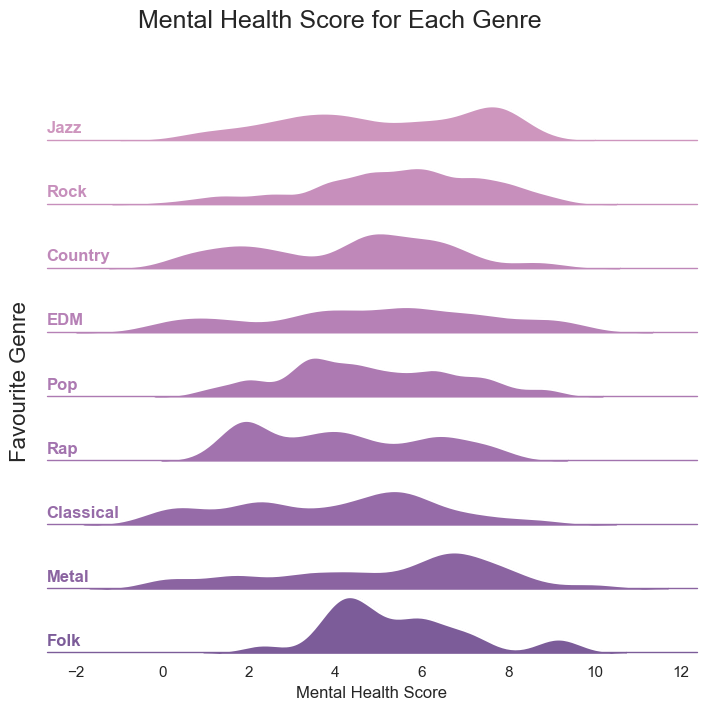

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, gamma=.5, light=.45)
v15 = sns.FacetGrid(merged_mc, row="Fav genre", hue="Fav genre", aspect=10, height=0.75, palette=pal)

# Draw the densities in a few steps
v15.map(sns.kdeplot, "Mental Health Score", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
v15.map(sns.kdeplot, "Mental Health Score", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
v15.refline(y=0, linewidth=1, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


v15.map(label, "Mental Health Score")

# Set the subplots to overlap
v15.fig.subplots_adjust(hspace=0.1)

# Add y-axis label and title
v15.fig.text(0.06, 0.5, "Favourite Genre", va='center', rotation='vertical', fontsize=16)
v15.fig.suptitle("Mental Health Score for Each Genre", fontsize=18, y=1.05)

v15.set_titles("")
v15.set(yticks=[], ylabel="")
v15.despine(bottom=True, left=True)

# Save the plot to the imgae folder
plt.savefig('../images/analysis2graph1.png', bbox_inches="tight")

#### Note: Based on graph above, it can be observed that from the participants who listed a favourite genre, Jazz seems to have the highest mental health scores. Jazz music is known to be calming so perhaps there is a reason behind why people with mental help issues are listening to Jazz music. EDM also has a fairly high score although it doesn't spike as much as some of the other ones. Regardless, I will dive into this to see if there is better correlation.

<seaborn.axisgrid.FacetGrid>

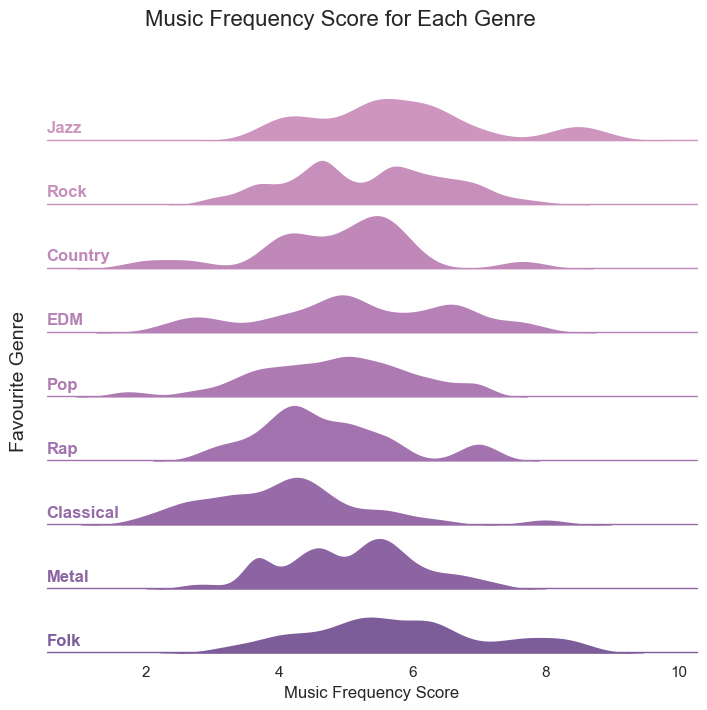

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, gamma=.5, light=.45)
v16 = sns.FacetGrid(merged_mc, row="Fav genre", hue="Fav genre", aspect=10, height=0.75, palette=pal)

# Draw the densities in a few steps
v16.map(sns.kdeplot, "Music Frequency Score", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
v16.map(sns.kdeplot, "Music Frequency Score", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
v16.refline(y=0, linewidth=1, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


v16.map(label, "Music Frequency Score")

# Set the subplots to overlap
v16.fig.subplots_adjust(hspace=0.1)

# Add y-axis label and title
v16.fig.text(0.06, 0.5, "Favourite Genre", va='center', rotation='vertical', fontsize=14)
v16.fig.suptitle("Music Frequency Score for Each Genre", fontsize=16, y=1.05)

v16.set_titles("")
v16.set(yticks=[], ylabel="")
v16.despine(bottom=True, left=True)


#### Note: I made the same graph again but with the Music Frequency Score instead. This graph is showing is how much someone listens to music based on what their favourite genre is. Jazz, Rock and EDM seem to have the highest scores suggesting that individuals listenting to these genres lsiten to more music in general. Folk has a surprisingly high amount of people at aronud 8 but most of the score is 6 and below.

#### Next, I will check if there is a correlation between age and the mental health score

<seaborn.axisgrid.JointGrid>

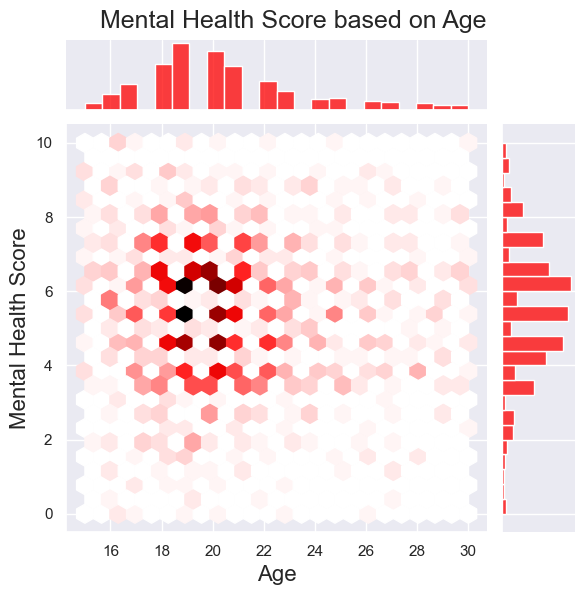

In [ ]:
sns.set_theme(palette="rocket", style='darkgrid')

v8 = sns.jointplot(x='Age', y='Mental Health Score', data=merged_mc, kind='hex', color="red")
v8.fig.subplots_adjust(top=0.93)
v8.fig.suptitle('Mental Health Score based on Age', fontsize=18)
v8.set_axis_labels('Age', 'Mental Health Score', fontsize=16)

#### These numbers seems pretty normal and nothing really stands out. I want to check the correlation between different music genres and age

<seaborn.axisgrid.JointGrid>

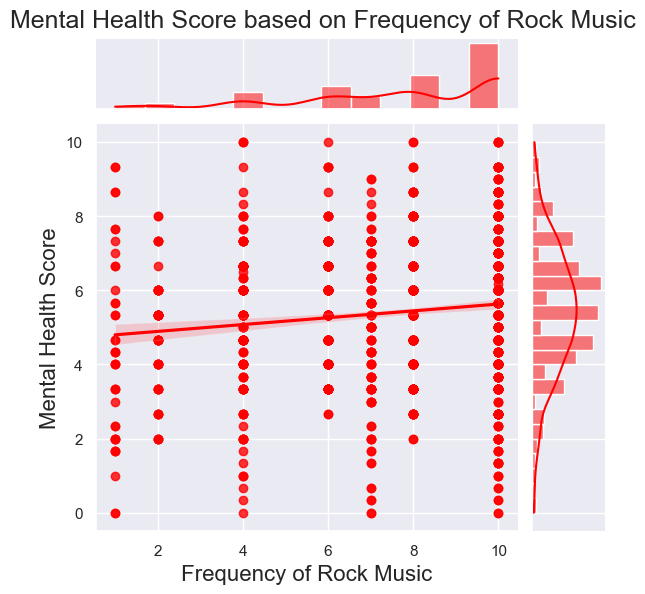

In [ ]:
v9 = sns.jointplot(x='Frequency_[Rock]_num', y='Mental Health Score', data=merged_mc, kind='reg', color="red")
v9.fig.subplots_adjust(top=0.93)
v9.fig.suptitle('Mental Health Score based on Frequency of Rock Music', fontsize=18)
v9.set_axis_labels('Frequency of Rock Music', 'Mental Health Score', fontsize=16)

<seaborn.axisgrid.JointGrid>

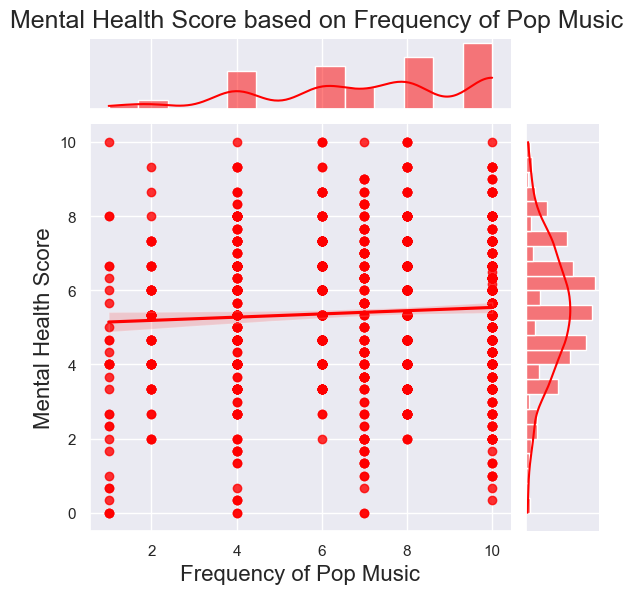

In [ ]:
v10 = sns.jointplot(x='Frequency_[Pop]_num', y='Mental Health Score', data=merged_mc, kind='reg', color="red")
v10.fig.subplots_adjust(top=0.93)
v10.fig.suptitle('Mental Health Score based on Frequency of Pop Music', fontsize=18)
v10.set_axis_labels('Frequency of Pop Music', 'Mental Health Score', fontsize=16)

<seaborn.axisgrid.JointGrid>

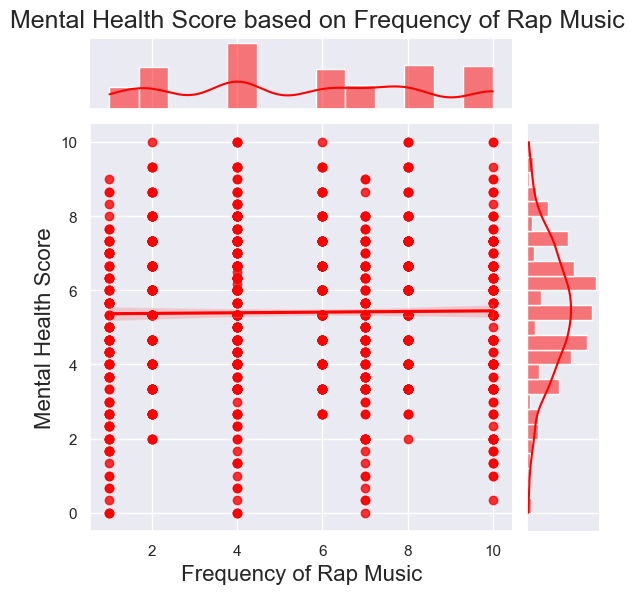

In [ ]:
v11 = sns.jointplot(x='Frequency_[Rap]_num', y='Mental Health Score', data=merged_mc, kind='reg', color="red")
v11.fig.subplots_adjust(top=0.93)
v11.fig.suptitle('Mental Health Score based on Frequency of Rap Music', fontsize=18)
v11.set_axis_labels('Frequency of Rap Music', 'Mental Health Score', fontsize=16)

#### Note: For the three graphs above looking at the frequency of rock, pop and rap music to the mental health score, the trendline is almost horizontal meaning there really isn't a strong correlation there.

#### Now I will compare the frequency of how often an individual is listening to music and compare it to each type of mental health condition.

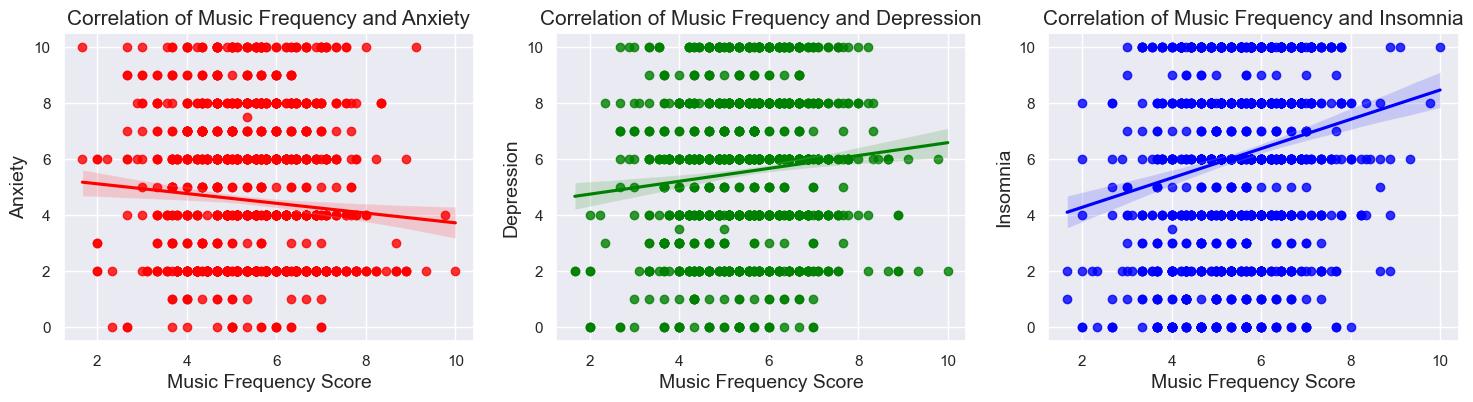

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the data and variables
data = merged_mc
x_vars = ['Music Frequency Score', 'Music Frequency Score', 'Music Frequency Score']
y_vars = ['Anxiety', 'Depression', 'Insomnia']
colors = ['red', 'green', 'blue']
titles = ['Correlation of Music Frequency and Anxiety',           'Correlation of Music Frequency and Depression',          'Correlation of Music Frequency and Insomnia']

# Create the figure and subplots
fig, v12 = plt.subplots(ncols=3, figsize=(18, 4))

# Plot the regplots on each subplot
sns.regplot(data=data, x=x_vars[0], y=y_vars[0], color=colors[0], ax=v12[0])
sns.regplot(data=data, x=x_vars[1], y=y_vars[1], color=colors[1], ax=v12[1])
sns.regplot(data=data, x=x_vars[2], y=y_vars[2], color=colors[2], ax=v12[2])

# Set the axis labels and title for each subplot
v12[0].set_xlabel(x_vars[0], fontsize=14)
v12[0].set_ylabel(y_vars[0], fontsize=14)
v12[0].set_title(titles[0], fontsize=15)

v12[1].set_xlabel(x_vars[1], fontsize=14)
v12[1].set_ylabel(y_vars[1], fontsize=14)
v12[1].set_title(titles[1], fontsize=15)

v12[2].set_xlabel(x_vars[2], fontsize=14)
v12[2].set_ylabel(y_vars[2], fontsize=14)
v12[2].set_title(titles[2], fontsize=15)


# Save the plot to the imgae folder
plt.savefig('../images/analysis2graph2.png', bbox_inches="tight")


#### There seems to be a negative correlation between music frequency and anxiety. This means that the more music someone listens to, the less anxious they get. Music is a pleasure for many and in times of stress and anxiety, music is an outlet for a lot of people. For this reason, this graph makes a lot of sense. 

#### Music frequency and depression have a positive relationship. This means that as the frequency of music increases, so does depression. Music can be isolating since it's just you and the music. I think it's possible that is someone who is already depressed listens to too much music, it's more likely to impact them. Regardless, this is an interesting result. 

#### Music frequency and insomnia have the strongest correlation yet and it just happens to be positive. As the frequency of music increases, insomnia levels greatly increase as well. Insomnia is the inability to sleep proplerly which makes sense in this case. Too much music, and especially closer to bedtime can affect our time of sleep, how many hours we get, and how productive those hours ultimately are. 

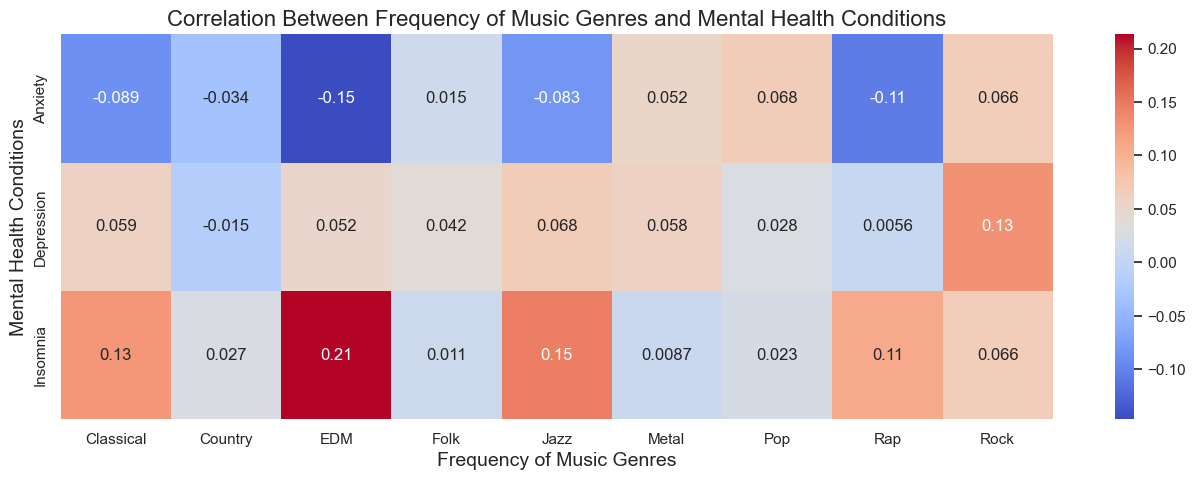

In [ ]:
cols = ['Frequency_[Classical]_num', 'Frequency_[Country]_num', 'Frequency_[EDM]_num','Frequency_[Folk]_num','Frequency_[Jazz]_num','Frequency_[Metal]_num','Frequency_[Pop]_num','Frequency_[Rap]_num','Frequency_[Rock]_num', 'Anxiety', 'Depression', 'Insomnia']

corr = merged_mc[cols].corr()

fig, ax = plt.subplots(figsize=(16,5))
v17 = sns.heatmap(corr.loc[['Anxiety', 'Depression', 'Insomnia'], ['Frequency_[Classical]_num', 'Frequency_[Country]_num', 'Frequency_[EDM]_num','Frequency_[Folk]_num','Frequency_[Jazz]_num','Frequency_[Metal]_num','Frequency_[Pop]_num','Frequency_[Rap]_num','Frequency_[Rock]_num']], cmap='coolwarm', annot=True, ax=ax)
v17.set_xticklabels(['Classical', 'Country', 'EDM', 'Folk', 'Jazz', 'Metal', 'Pop', 'Rap', 'Rock'], rotation=0)

v17.set_xlabel('Frequency of Music Genres', fontsize=14)
v17.set_ylabel('Mental Health Conditions', fontsize=14)
v17.set_title('Correlation Between Frequency of Music Genres and Mental Health Conditions', fontsize=16)

v17

# Save the plot to the imgae folder
fig.savefig('../images/analysis2graph3.png', bbox_inches="tight")

#### Note: These numbers represent the strength and direction of linear relationship between two variables. Based on this graph, Frequency [EDM] and Insomnia have the highest positive linear relationship at 0.21, which means that as the frequency of EDM music increases, so does the level of insomnia. EDM and anxiety have a negative correlation which makes sense since dance music is a good outlet to get away from personal stresses and troubles.

## Conclusion

In this analysis, I wanted to explore the relationships between music and mental health. I set my focus towards the different genres and relating them to different mental health conditions. Through my analysis, I made many interesting graphs which ultimately allowed me to gain a stronger understanding and begin my journey in data analytics. I also focused people aged 15-30 in order gain an understanding for a younger population.

**How do people's favourite genres differ, and do those differing preferences have any correlations with mental health conditions?** 

I made graph v15 which compared each type of genre to the mental health score, an average between an individuals anxiety, depression and insomnia levels. Most of the results seemed to have an average between 5 and 6, although, genres like EDM and Jazz had higher scores. Jazz in specifc had a strong peak around 8 which was pretty high. EDM didn't have a high peak but it was spread consistently and ended around a score of 9. On the flip side, folk music had less mental health score. It had a really large peak at around 4 suggesting people who listen to Folk music have less mental health issues.


**Which specific genres lead to more mental health conditions?**

I wanted to see if listening to specific genres would affect mental health conditions. I used this to go further into each mental health condition. v12 which is divided into v12[0], v12[1] and v12[2] compared the frequency of music to each mental health condition: 
- Music frequency and anxiety had a negative relationship suggesting that perhaps music acts as an outlet for people dealing with stress and anxiety. 
- Music frequency and depression had a positive relationship suggesting that more music leads to depression. However, I think it's possible that people who are already dealing with depression tend to be affected by this more because music is isolating them further. 
- Music frequency and insomnia had the strongest correlation where more music led to more insomnia. I will go into this further, however, this made sense because music, especially the genres being tested in this ananlysis are not calming and won't be the best for trying to sleep. 

I then used graph v17 to find which genres were actually affecting the results found from v12. 

**Anxiety:**
- Anxiety had a negative relationship with music frequency. The heatmap sugegsts that EDM and Rap are the biggest factors behind these results. Classical, Folk and Country are also affecting the negative results albeit, to a lesser extent. With EDM and Rap, they are some of the most popular genres in the world and many people listen to these genres to get away from their struggles. Both are used at parties, clubs, etc. which are often considered social places that allow people to spend time with people.

**Depression:**
- Depression had a positive relationship with music frequency. Most of the genres have a slightly positive relationship. The one outlier is Rock music with a score of 0.13. Rock music often has dark lyrics and talks about topics like breakups, betrayal, loss. Rock music is also very aggressive so perhaps these factors affect the brain negatively.

**Insomnia:**
- Insomnia had the strongest correlation with the leading genres being EDM, Jass, Classical and Rap. Even among these genres, EDM stands out quite a bit which makes it the most appealing. Loud, dance music is often used at parties and clubs which often go late into the night. Being one of the most popular genres, it makes sense that extensive use of loud, disruptive music would affect our sleep. Rap and Jazz also match this since they often have a lot of beats, sounds and instruments. Classical music however is a surprise and would need additional research.

This ananlysis was really interesting but it's important to consider that with our sample size, we don't know the full story yet. Additional research will be required to find other factors affecting these results. However, I think it's more than fair to say that different music genres do have differernt affects on our mental health. To what extent? That is still yet to be determined.